# OASIS INFOBYTE TASK 2

## UNEMPLOYMENT ANALYSIS WITH PYTHON <br> ***Analysis of Unemployment Rate During Covid-19 in India***

In [1]:
#Prepared by; Seghosime Joshua
#Email; vanjosh8@gmail.com
#phone; +2347032803248

In [2]:
#imorting the libraries
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='iframe'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#loading the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Unemployment\Unemployment_Rate_upto_11_2020.csv')

In [4]:
#checking the dataset
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
#clearly the dataframe shows that some column features names are incorrect, let's rename them.
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed',
             'Estimated Labour Participation Rate','Region','longitude','latitude']

In [6]:
#check to see if they have been changed
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
#checking the number of rows and column
df.shape

(267, 9)

In [8]:
#checking general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
#printing all the column features
df.columns.tolist()

['States',
 'Date',
 'Frequency',
 'Estimated Unemployment Rate',
 'Estimated Employed',
 'Estimated Labour Participation Rate',
 'Region',
 'longitude',
 'latitude']

In [10]:
#checking for missing values
df.isna().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64

In [11]:
#printing computed general statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate,267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


## checking the correlation of dataset features

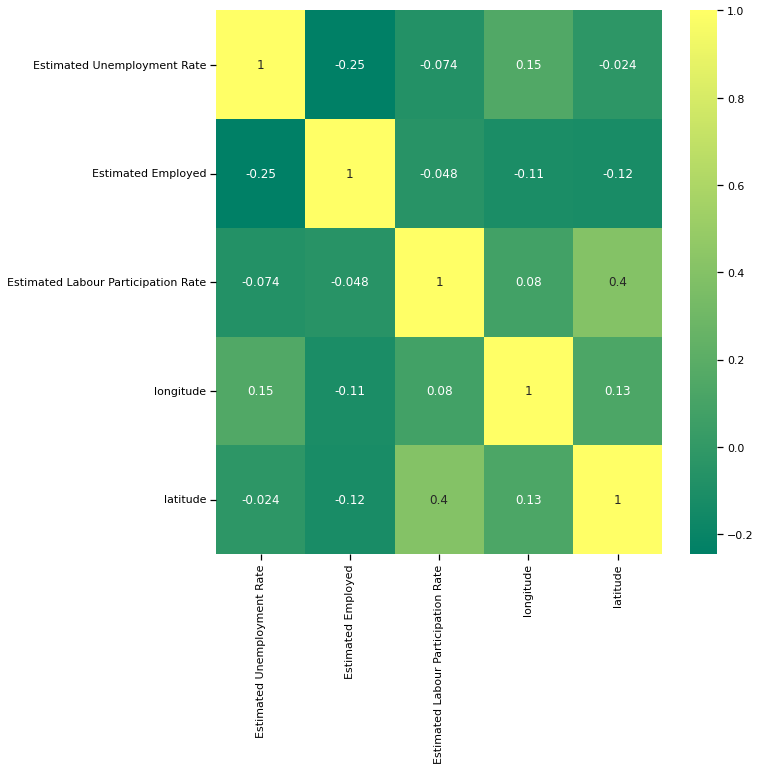

In [12]:
#define the features of the dataset
heat_maps = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate',
       'longitude', 'latitude']]
#printing the correlation
heat_maps = heat_maps.corr()
#setting the fig size and plot
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

***obviously estimated labour participation rate has a very strong correlation for measuring unemployment.***

## Unemployemnt Rate in Each State in India

In [13]:
fig = px.bar(df,x='States',y='Estimated Unemployment Rate',color='States',
             title='Unemployment Rate in Each State in India',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

## Scatter Matrix Relationship

In [14]:
fig = px.scatter_matrix(df,template='plotly',
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

## Unemployment Rate by Date and Region

In [15]:
#visualizing the rate
fig = px.scatter_3d(df, x = 'Date', y = 'Estimated Unemployment Rate', z = 'Region', color='Region')
fig.show()
fig.write_image('3d.png')

## Unemployment Rate, States and Labour Participation

In [16]:
#visualizing the rate
fig = px.line_3d(df, x = 'States', y = 'Estimated Unemployment Rate',
                    z = 'Estimated Labour Participation Rate', color='States')
fig.show()
fig.write_image('3d.png')

## Unemployment Rate According to Labour Participation 

In [17]:
fg = px.histogram(df,x='States',y='Estimated Labour Participation Rate',color='Region',title='Unemployment rate',
                  animation_frame='Date',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

## Final Visual Summary of Unemployment Rate

In [18]:
unemploment = df[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

# Thank You.